<a href="https://colab.research.google.com/github/PabloYepes27/DataScience/blob/main/Introduction_to_Data_Science_With_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

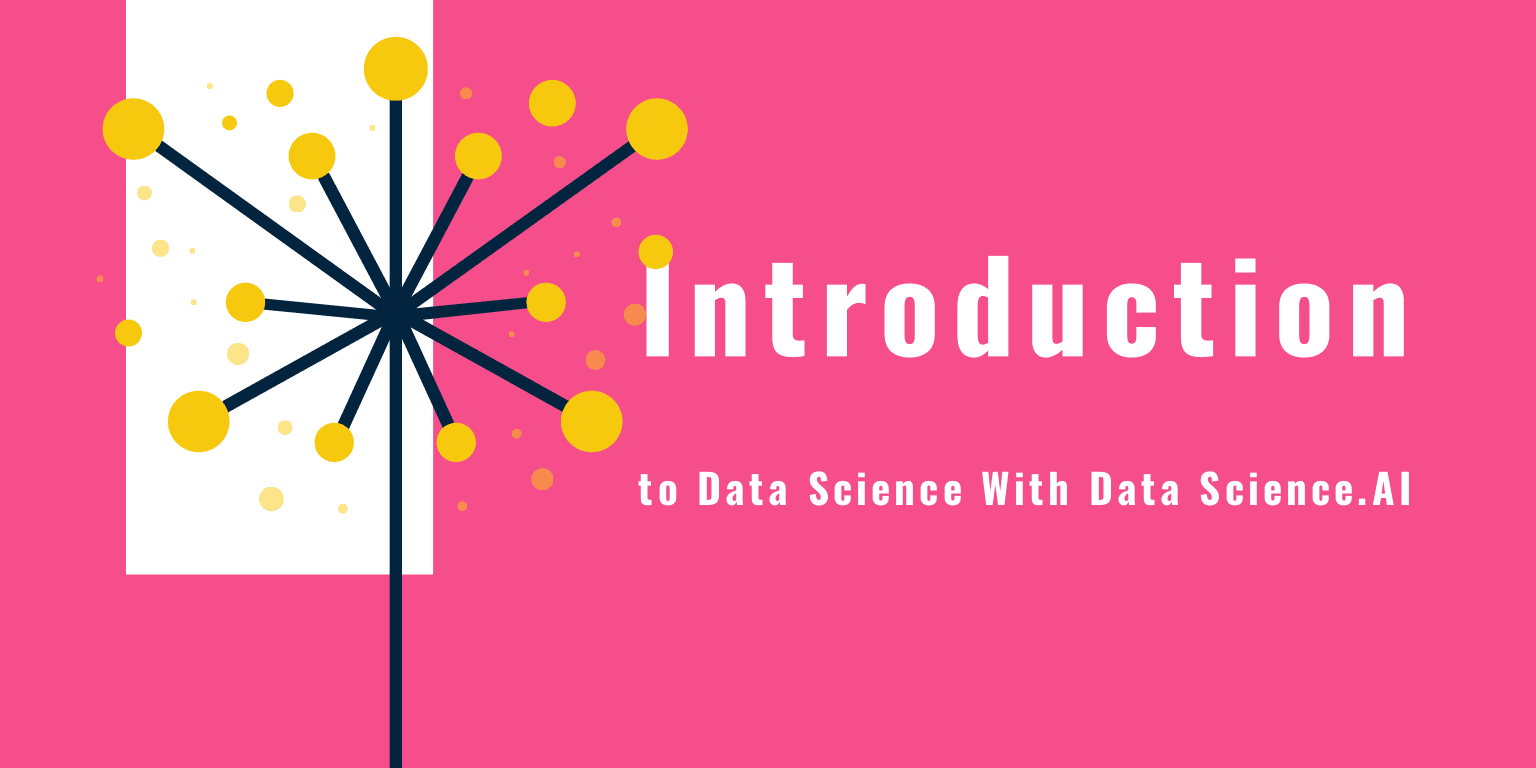
This is a copy of [Introduction to Data Science With Data Science.IA](https://www.kaggle.com/harunshimanto/introduction-to-data-science-with-data-science-ai) in order to study and practice


Useful `LINKS`:

&#128187; 1.  [Understanding European Soccer Video](https://www.youtube.com/watch?v=FZ4i3KX2CW4)

&#128187; 2. [European Soccer Database Research Paper](https://drive.google.com/open?id=1Zu58FMy9JJZMBf_7ZnioKwZGP73qYD-U)

&#128187; 3. [sqllite3 for Database](https://docs.python.org/3/library/sqlite3.html)

&#128187; 4. [Matplotlib  Visualization ](https://matplotlib.org/api/pyplot_api.html)

# &#128204; Getting Started

To get started, we will need to:

Download the data from: https://www.kaggle.com/hugomathien/soccer

Extract the zip file called "soccer.zip" 

## &#128209; Import Libraries

We will start by importing the Python libraries we will be using in this analysis. These libraries include:

* sqllite3 for interacting with a local relational database; 

* pandas and numpy for data ingestion and manipulation.

* matplotlib for data visualization

* specific methods from sklearn for Machine Learning 

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

* ## &#128268; Connection Database: ***datbase.sqlite***



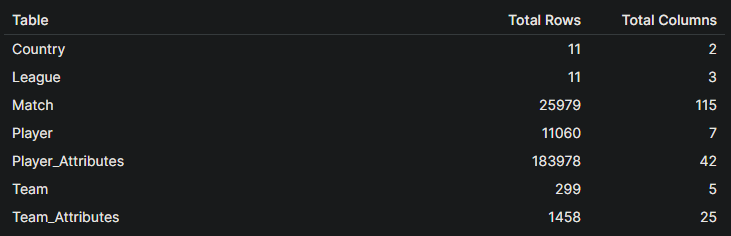



In [3]:
from google.colab import drive # How to connect to a database from google colab in google drive?

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Here you should find where your database is localted within google drive
!ls /content/gdrive/MyDrive/Documents/Programming/'DATA SCIENCE'/'Colab Notebooks'/'Introduction to Data Science With Data Science.AI'/

 database.sqlite
 introduction-to-data-science-with-data-science-ai.ipynb
'Introduction to Data Science With Data Science.ipynb'


In [5]:
path = "/content/gdrive/MyDrive/Documents/Programming/DATA SCIENCE/Colab Notebooks/Introduction to Data Science With Data Science.AI/"
database = path + 'database.sqlite'
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn) 

# What happened in this line?
# sqlite_master is an internal table that is present in all SQLite databases. 
# The content of this table describes the database's schema.
# The SQLite database holds the database schema in the table sqlite_master.

print("Connection Succesful", conn)
print(tables)

Connection Succesful <sqlite3.Connection object at 0x7f02d9546c70>
    type  ...                                                sql
0  table  ...             CREATE TABLE sqlite_sequence(name,seq)
1  table  ...  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...
2  table  ...  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3  table  ...  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4  table  ...  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5  table  ...  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6  table  ...  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...
7  table  ...  CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...

[8 rows x 5 columns]


## &#128197; Load and Read the Data
Now, we will need to read the dataset using the commands below.

Note: Make sure Database connection before you run the data load and read code below.

df is a variable pointing to a pandas data frame. We will learn about them in an upcoming kernel.

In [6]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn) # Simple SQL query for display all from Player_Attributes table
df  # Show the dataframe df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## &#128221; Exploring Data
We will start our data exploration by generating simple statistics of the data. 

* Let us look at what the data columns are using a pandas attribute called "columns".

In [7]:
df.columns # shows The column labels of the DataFrame.

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

* Next will display simple statistics of our dataset. You need to run each cell to make sure you see the outputs.

In [8]:
df.describe().transpose()

# df.describe() = Generate descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

# df.transpose() = Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.
# The property T is an accessor to the method

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## &#128295; Data Cleaning: Handling Missing Data:

Real data is never clean. We need to make sure we clean the data by converting or getting rid of null or missing values.
The next code cell will show you if any of the 183978 rows have null value in one of the 42 columns.

In [9]:
df.isnull().any().any(), df.shape 

# we executed all the commands next to each other,  the answer is given next to each other

# df.isnull() = (Detect missing values). Return a boolean same-sized object indicating if the values are NA. NA values, 
# such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values

# df.any() = (Return whether any element is True, potentially over an axis). 
# Returns False unless there at least one element within a series or along a Dataframe axis that is True or equivalent

# We use twice any().any() for col and rows

# df.shape = Return a tuple representing the dimensionality of the DataFrame.

(True, (183978, 42))

* Now let's try to find how many data points in each column are null.

In [10]:
df.isnull().sum(axis=0) 

# df.sum() = Return the sum of the values for the requested axis.


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

## &#128223; Fixing Null Values by Deleting Them

* In our next two lines, we will drop the null values by going through each row.

In [11]:
rows = df.shape[0] # We want to know how many entries(rows) we have before delete the null ones
df = df.dropna() # df.dropna() = Remove missing values.

* Now if we check the null values and number of rows again, we will see that there are no null values and number of rows decreased accordingly.

In [12]:
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

* To find exactly how many lines we removed, we need to subtract the current number of rows in our data frame from the original number of rows.

In [13]:
rows - df.shape[1]  ## df.shape[0] = num_rows    df.shape[1] = num_columns

183936

## &#128200; Predicting: 'overall_rating' of a player

In [14]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


![](http://)* Now that our data cleaning step is reasonably complete and we can trust and understand the data more, we will start diving into the dataset further.

### Let's take a look at top few rows.
We will use the head function for data frames for this task. This gives us every column in every row.

In [15]:
df.head(10) 

# df.head(n) = Return the first n rows.

# This function returns the first n rows for the object based on position.
# It is useful for quickly testing if your object has the right type of data in it.

# For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n].

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


* Most of the time, we are only interested in plotting some columns. In that case, we can use the pandas column selection option as follows. Please ignore the first column in the output of the one line code below. It is the unique identifier that acts as an index for the data.

**Note: From this point on, we will start referring to the columns as "features" in our description.**

In [16]:
df[:10][['penalties', 'overall_rating']]

# df[rows][columns] - Here we are specifying the first 10 rows and the columns labeled as "penalties" and "overall_rating"

,penalties,overall_rating
0,48.0,67.0
1,48.0,67.0
2,48.0,62.0
3,47.0,61.0
4,47.0,61.0
5,59.0,74.0
6,59.0,74.0
7,59.0,73.0
8,59.0,73.0
9,59.0,73.0


## &#128505; &#128503;  Feature Correlation Analysis

Next, we will check if 'penalties' is correlated to 'overall_rating'. We are using a similar selection operation, bu this time for all the rows and within the correlation function.


## &#128101; Are these correlated (using Pearson's correlation coefficient) ?

To understand better the [correlation](https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/)

In [17]:
df['overall_rating'].corr(df['penalties'])


# df.corr() = Compute pairwise correlation of columns, excluding NA/null values.

# Correlation coefficients r(X, Y) is a statistic that measures the degree that Y is a function of X and vice versa

# Pearson coefficient measures the degree of the relationship between linearly related variables

0.39271510791118824

#### &#128221; Observations:

We see that Pearson's Correlation Coefficient for these two columns is 0.39. 

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0. shows some correlation, although it could be stronger. 

At least, we have these attributes which are slightly correlated.

Next, we will create a list of features that we would like to iterate the same operation on.

## &#128195; Create a list of potential Features that you want to measure correlation with

In [18]:
potentialFeatures  = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

* The for loop below prints out the correlation coefficient of "overall_rating" of a player with each feature we added to the list as potential.

In [19]:
for feature in potentialFeatures:
  related = df['overall_rating'].corr(df[feature])
  print("%s: %f" % (feature, related))


acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606



## &#128285; Which features have the highest correlation with overall_rating?
* Looking at the values printed by the previous cell, we notice that the to two are "ball_control" (0.44) and "shot_power" (0.43). So these two features seem to have higher correlation with "overall_rating".

# &#128200; &#128201; &#128202; Data Visualization:


* Next we will start plotting the correlation coefficients of each feature with "overall_rating". We start by selecting the columns and creating a list with correlation coefficients, called "correlations".

In [21]:
correlation_matrix = df.corr() 
# correlation_matrix is a matrix with all features or columns (with numeric values) coorrelated with each other (all features vs all features)

correlation_matrix["overall_rating"].sort_values(ascending=False) 
# We only want to show(in a sorted way) the correlation between the features with "overall_ratings" (NO all features vs all features as above)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

* Now we saw the correlation values, we need to create a list with them, so we first create a list with all the feature names and then create another with the correlations ["overall_rating" vs "feature_name"]

In [24]:
columns = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [27]:
correlations = [ df["overall_rating"].corr(df[feature]) for feature in columns]

### &#128223; Check length of Columns and Correlations

In [28]:
len(columns), len(correlations)

(34, 34)

# &#128202; Graph or Ploting

## &#128681; Highlites:
Now that we make sure that the number of selected features and the correlations calculated are the same, e.g., both 34 in this case. Next couple of cells show some lines of code that use pandas plotting functions to create  graph of these correlation vealues and column names.

In [53]:
def plot_dataframe(df, y_label):  
    color='blue'
    fig = plt.gcf() # Get the current figure. If no current figure exists, a new one is created using figure().
    fig.set_size_inches(10, 5) # Set the figure size(width, height) in inches.
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color) # ??
    ax.set_xticks(df.index) # axis.set_xticks(List of tick locations) = Set the xaxis' tick locations.
    ax.set_xticklabels(df.attributes, rotation=80); # Set the xaxis' labels with list of string labels after set de xaxis' tick locations
    plt.show()

In [54]:
df1 = pd.DataFrame({'attributes': columns, "correlation": correlations})

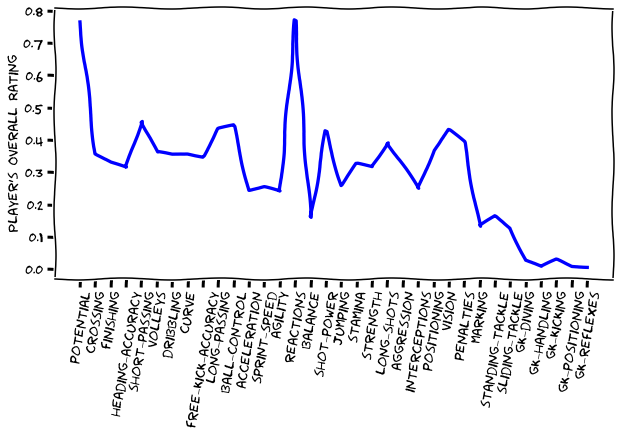

In [56]:
plot_dataframe(df1, "Player\'s Overall Rating")
plt.xkcd() # ??

# &#128304; Clustering Players into Similar Groups
Until now, we used basic statistics and correlation coefficients to start forming an opinion, but can we do better? What if we took some features and start looking at each player using those features? Can we group similar players based on these features? Let's see how we can do this.

### &#128199; Note: 
Generally, someone with domain knowledge needs to define which features. We could have also selected some of the features with highest correlation with overall_rating. However, it does not guarantee best outcome always as we are not sure if the top five features are independent. For example, if 4 of the 5 features depend on the remaining 1 feature, taking all 5 does not give new information.

## &#128505; &#128503; Select Features on Which to Group Players

In [57]:
selectivefeatures =  ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [65]:
df_select = df[selectivefeatures].copy(deep=True) 

# copy() = Make a copy of this object’s indices and data.

# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

# When deep=False, a new object will be created without copying the calling object’s data or index (only references to the 
# data and index are copied). Any changes to the data of the original will be reflected in the shallow copy (and vice versa).

In [66]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
0,10.0,71.0,65.0,70.0,69.0
1,10.0,71.0,65.0,70.0,69.0
2,10.0,66.0,65.0,41.0,66.0
3,9.0,65.0,62.0,40.0,63.0
4,9.0,65.0,62.0,40.0,63.0


# &#128187; Perform KMeans Clustering


### &#128199; Note: 
Now we will use a machine learning method called KMeans to cluster(group) the values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle). We will ask for four clusters. 

* **Clustering** is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated

* **[Kmeans](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)** algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

In [67]:
# Perform scaling on the dataframe containing the features

data = scale(df_select) # Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.

# define number of clusters
numOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=numOfClusters, n_init=20).fit(data) # what does fit() method do ??
# To learn how KMeans work Visit this https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

In [71]:
model.__dict__ # Test

{'algorithm': 'auto',
 'cluster_centers_': array([[-0.33818363, -0.8428362 ,  0.54830034,  0.4073526 ,  0.55073023],
        [-0.4769112 ,  0.10592163, -0.94779114, -0.97502593, -0.91427219],
        [-0.03878113,  0.70471858,  1.02762878,  0.9827296 ,  1.03015042],
        [ 1.92092215,  0.03657992, -1.11271174, -0.65489838, -1.20212997]]),
 'copy_x': True,
 'inertia_': 315966.3267272418,
 'init': 'k-means++',
 'labels_': array([0, 0, 0, ..., 3, 3, 3], dtype=int32),
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 20,
 'n_iter_': 22,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [75]:
len(model.labels_), model.labels_ # Test

(180354, array([0, 0, 0, ..., 3, 3, 3], dtype=int32))

In [69]:
print(90 * "*")
print("Count of players in each cluster")
print(90 * "*")

pd.value_counts(model.labels_, sort=False) # pd.value_counts() = Return a Series containing counts of unique rows in the DataFrame.

******************************************************************************************
Count of players in each cluster
******************************************************************************************


0    50211
1    55905
2    50465
3    23773
dtype: int64

In [83]:
!pip install pandas.tools # https://stackoverflow.com/questions/54473018/where-is-pandas-tools

ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


In [88]:
def pd_centers(featuresUsed, centers):
    """We are defining a function pd_centers to determine the center of the 
    centroids. To the already existing features columns, we are adding an 
    additional column named 'prediction' which will contain the cluster number ."""
    from itertools import cycle, islice
    # from pandas.tools.plotting import parallel_coordinates  # Out of date
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas DF for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    # from pandas.tools.plotting import parallel_coordinates  # Out of date
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [89]:
Pan = pd_centers(featuresUsed=selectivefeatures, centers=model.cluster_centers_)
Pan

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.338184,-0.842836,0.548300,0.407353,0.550730,0
1,-0.476911,0.105922,-0.947791,-0.975026,-0.914272,1
2,-0.038781,0.704719,1.027629,0.982730,1.030150,2
3,1.920922,0.036580,-1.112712,-0.654898,-1.202130,3


# &#128202; &#128201; &#128200; Visualization of Clusters

## &#128681; Highlites:
We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. We can visualize these profiles by plotting the centers for each cluster, i.e., the average values for each featuere within the cluster. 

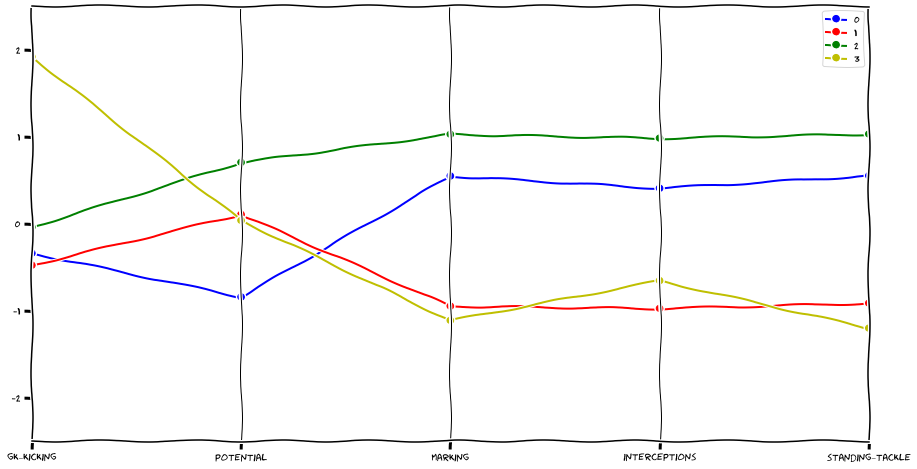

In [90]:
%matplotlib inline 
parallel_plot(Pan)
plt.xkcd()